In [72]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cf7f4358-8972-40ca-8b83-541997a74041',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [79]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [218]:
#Normalize the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
#df

In [101]:
def run_API():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cf7f4358-8972-40ca-8b83-541997a74041',
    }
    
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    df = pd.concat([df,df2])
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df 
    
    if not os.path.isfile(r'/Users/jk/desktop/CryptoAPI.csv'):
        df.to_csv(r'/Users/jk/desktop/CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'/Users/jk/desktop/CryptoAPI.csv', mode='a', header=False)

In [102]:
#Set up API Runner sleep timer 

import os
from time import time
from time import sleep

for i in range(333):
    run_API()
    print('API Runner completed!')
    sleep(10)
exit()

API Runner completed!
API Runner completed!
API Runner completed!
API Runner completed!


KeyboardInterrupt: 

In [219]:
#Read the excel file that contains API data

df2 = pd.read_csv(r'/Users/jk/desktop/CryptoAPI.csv')
#df2

In [205]:
#Get rid of scientific notation from '%supply' columns

pd.set_option('display.float', lambda x: '%.5f' % x)

In [206]:
#Display the 'percent_change' columns only 

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [207]:
#Restructure the dataframe format

df4 = df3.stack()
#df4

In [208]:
#Give the values a column name

df5 = df4.to_frame(name='values')
#df5

In [209]:
#Count the number of values within the data frame

df5.count()

values    50
dtype: int64

In [210]:
#Create an index for the values stored within the data frame

index = pd.Index(range(50))

df6 = df5.reset_index()
#df6

###### 

In [211]:
#Rename the percent change column from 'level_1' : 'percent_change'

df7 = df6.rename(columns={'level_1':'percent_change'})
#df7

In [212]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
#df7

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

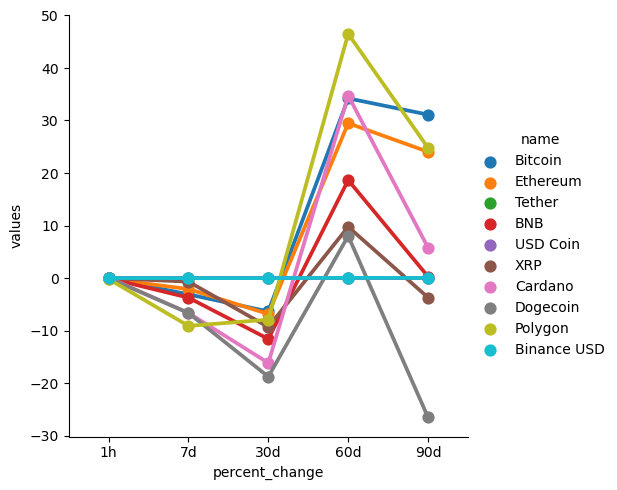

In [216]:
#Graph the data 

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()